### E03 - 뉴스기사 크롤링 및 분류

In [ ]:
# Mecab: 형태소 분석기
# git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
# cd Mecab-ko-for-Google-Colab
# bash install_mecab_ko_on_colab190912.sh
# 설치 시간이 길고 주피터 커널 다시 연결 필요
# pip install beautifulsoup4
# pip install newspaper3k
# pip install konlpy

# 크롤링: 웹페이지로부터 데이터를 추출하는 행위
# 크롤러: 크롤링하는 소프트웨어

In [ ]:
# HTML문서에는 선택자(selector)가 있다. id, class
# class: 비슷한 성격을 가지는 요소를 그룹으로 관리하고 싶을 때

# <html> 
#     <head> 
#     </head> 
#     <body> 
#         <h1> 장바구니
#             <p id='clothes' class='name' title='라운드티'> 라운드티
#                 <span class = 'number'> 25 </span> 
#                 <span class = 'price'> 29000 </span> 
#                 <span class = 'menu'> 의류</span> 
#                 <a href = 'http://www.naver.com'> 바로가기 </a> 
#             </p> 
#             <p id='watch' class='name' title='시계'> 시계
#                 <span class = 'number'> 28 </span>
#                 <span class = 'price'> 32000 </span> 
#                 <span class = 'menu'> 악세서리 </span> 
#                 <a href = 'http://www.facebook.com'> 바로가기 </a> 
#             </p> 
#         </h1> 
#     </body> 
# </html>

In [1]:
# BeautifulSoup 사용법
from bs4 import BeautifulSoup

#- HTML 문서를 문자열 html로 저장합니다.
html = '''
<html> 
    <head> 
    </head> 
    <body> 
        <h1> 장바구니
            <p id='clothes' class='name' title='라운드티'> 라운드티
                <span class = 'number'> 25 </span> 
                <span class = 'price'> 29000 </span> 
                <span class = 'menu'> 의류</span> 
                <a href = 'http://www.naver.com'> 바로가기 </a> 
            </p> 
            <p id='watch' class='name' title='시계'> 시계
                <span class = 'number'> 28 </span>
                <span class = 'price'> 32000 </span> 
                <span class = 'menu'> 악세서리 </span> 
                <a href = 'http://www.facebook.com'> 바로가기 </a> 
            </p> 
        </h1> 
    </body> 
</html>
'''

#- BeautifulSoup 인스턴스를 생성합니다.
#- 두번째 매개변수는 분석할 분석기(parser)의 종류입니다.
soup = BeautifulSoup(html, 'html.parser')

In [2]:
# select()함수를 해당 태그의 내용을 가져올 수 있다.
print(soup.select('body'))

[<body>
<h1> 장바구니
            <p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>
<p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>
</h1>
</body>]


In [3]:
print(soup.select('p'))

[<p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>, <p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>]


In [8]:
print(soup.select('h1 .name .menu'))

# class로 지정한다.

[<span class="menu"> 의류</span>, <span class="menu"> 악세서리 </span>]


In [13]:
# newspaper3k: 뉴스 데이터를 크롤링하기 위해 만들어진 패키지, URL로부터 기사 제목과 텍스트 추출
from newspaper import Article

#- 파싱할 뉴스 기사 주소입니다.
url = 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=030&aid=0002881076'

#- 언어가 한국어이므로 language='ko'로 설정해줍니다.
article = Article(url, language='ko')
article.download()
article.parse()

In [14]:
#- 기사 제목을 출력합니다.
print('기사 제목 :')
print(article.title)
print('')

#- 기사 내용을 출력합니다.
print('기사 내용 :')
print(article.text)

기사 제목 :
[AI 사피엔스 시대]자연어처리 기술, 컴퓨팅 파워 경쟁 시대로

기사 내용 :
[Copyright ⓒ 전자신문 & 전자신문인터넷, 무단전재 및 재배포 금지]

주로 아이디어와 기술력으로 경쟁했던 자연어처리 인공지능(AI) 분야는 점차 컴퓨팅 파워 싸움으로 무게 추가 이동하고 있다. 모델이 대형화되면서 향상된 퍼포먼스 확보에 필요한 자금 규모도 커지고 있다. 자칫 대기업 자본력에 휘둘릴 수 있다는 우려도 함께 나온다.자연어처리(NLP)는 인간이 사용하는 언어 체계를 기계가 인식하도록 알고리즘을 디자인하는 기술이다. 흔히 말하는 컴퓨터 혹은 인간과 대화하는 컴퓨터 관련 기술이 포함된다.목적에 따라 세 가지 카테고리로 나뉜다. 인간이 제기한 질문에 자동으로 적절한 답을 찾아주는 '질의응답(QA)', 원하는 업무를 지시했을 때 작업을 수행하는 '테스크 컴플리션', 그리고 특별한 목적이 없는 대화를 의미하는 '오픈도메인 컨버세이션(비목적성 대화)'이 있다. 각기 발전해왔던 세 가지 기술은 지난 2018년 구글의 인공지능 언어모델 '버트(BERT)'의 등장으로 패러다임이 전환됐다. 압도적인 성능으로 대량의 프리트레이닝(사전학습)이 가능해지면서 굳이 셋을 구분할 필요가 없어진 것이다.기계학습 연구에서 모델을 학습할 때는 지도학습과 비지도학습, 강화학습 중 하나를 골라 활용한다. 지도학습은 사람이 적절한 입력과 출력을 부여하는 방식이다. 정답이 정해져 있고 기계의 정답률도 쉽게 측정할 수 있다. 반면에 비지도학습은 정답이 정해지지 않은 데이터에 대해서도 기계가 스스로 클러스터링 등을 통해 학습한다. 체계화되지 않은 대량의 데이터를 학습 가능하지만 학습이 맞게 됐는지 확인하기 어렵다.버트는 기존 AI 학습 방법을 혁신적으로 바꿔놨다는 평가를 받는다. 자연어처리를 교사 없이 양방향으로 사전 학습하는 최초의 시스템이다. 비지도학습 방식을 사용하면서도 기존 존재했던 어떤 기술보다 뛰어난 성능을 보여준다. 최근 1년 반 동안 버트를 필두로 AI 모델은 급격히 대형화되

In [19]:
# URL구조 파악하기
# &sid= : 카테고리 번호, 100:정치, 101:경제, 102:사회, 103:생활/문화, 104:세계, 105:IT/과학, 110:오피니언
# &date= : 날짜, &page= : 페이지번호

# 크롤러를 만들기 전 필요한 도구들을 임포트합니다.
import requests
import pandas as pd
from bs4 import BeautifulSoup

# 페이지 수, 카테고리, 날짜를 입력값으로 받습니다.
def make_urllist(page_num, code, date): 
    urllist= []
    for i in range(1, page_num + 1):
        url = 'https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1='+str(code)+'&date='+str(date)+'&page='+str(i)   
        news = requests.get(url)

        # BeautifulSoup의 인스턴스 생성합니다. 파서는 html.parser를 사용합니다.
        soup = BeautifulSoup(news.content, 'html.parser')

        # CASE 1
        news_list = soup.select('.newsflash_body .type06_headline li dl')
        # CASE 2
        news_list.extend(soup.select('.newsflash_body .type06 li dl'))
        
        # 각 뉴스로부터 a 태그인 <a href ='주소'> 에서 '주소'만을 가져옵니다.
        for line in news_list:
            urllist.append(line.a.get('href'))
    return urllist

In [24]:
# 2020년 05월 06일 경제(101)카테고리에서 2page에 있는 뉴스 URL가져오기
url_list = make_urllist(2, 101, 20200506)
print('뉴스 기사의 개수: ',len(url_list), sep='')

뉴스 기사의 개수:40


In [25]:
url_list[:5]

['https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451723',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451721',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451718',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=003&aid=0009849190',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451717']

In [32]:
# 카테고리를 dict으로 저장
idx2word = {'101' : '경제', '102' : '사회', '103' : '생활/문화', '105' : 'IT/과학'}

In [35]:
from newspaper import Article

#- 데이터프레임을 생성하는 함수입니다.
def make_data(urllist, code):
    text_list = []
    for url in urllist:
        article = Article(url, language='ko')
        article.download()
        article.parse()
        text_list.append(article.text)

        #- 데이터프레임의 'news' 키 아래 파싱한 텍스트를 밸류로 붙여줍니다.
        df = pd.DataFrame({'news': text_list})

        #- 데이터프레임의 'code' 키 아래 한글 카테고리명을 붙여줍니다.
        df['code'] = idx2word[str(code)]
    return df

In [36]:
data = make_data(url_list, 101)
#- 상위 10개만 출력해봅니다.
data[:10]

,news,code
0,고려은단이 5월을 맞아 응원 메시지를 공유하는 ‘5월 5글자로 응원 부탁해!’ 이벤...,경제
1,코리아나화장품의 민감성 피부를 위한 저자극 스킨케어 브랜드 '프리엔제'가 마르고 건...,경제
2,서울장수주식회사가 부드럽고 달콤한 맛으로 인기를 모으고 있는 생막걸리 ‘인생막걸리’...,경제
3,[서울=뉴시스] 오동현 기자 = 모바일 게임 기업 컴투스는 3D 모바일 야구 게임 ...,경제
4,대원제약이 2020년 상반기 신입과 경력 정기 공채를 실시합니다.정기 공채 모집분야...,경제
5,"[AFP=연합뉴스] [AFP=연합뉴스]\n\n""요즘은 잔인한 날""…리프트도 앞서 9...",경제
6,이재용 삼성전자 부회장이 6일 삼성전자 서울 서초사옥에서 대국민 사과 회견을 하기 ...,경제
7,JW중외제약이 A형 혈우병 예방요법제 ‘헴리브라피하주사를 출시하고 본격적인 마케팅 ...,경제
8,"옵티팜과 휴벳바이오가 공동 개발중인 백신 후보 물질에 대해 마우스, 기니피그, 미니...",경제
9,[한국경제TV 신동호 기자]\n\n전남 나주시와 충북 청주시가 방사광 가속기 구축사...,경제


In [37]:
# 여러 개의 카테고리의 뉴스를 수집하기
code_list = [102, 103, 105]
code_list

[102, 103, 105]

In [38]:
def make_total_data(page_num, code_list, date):
    df = None

    for code in code_list:
        url_list = make_urllist(page_num, code, date)
        df_temp = make_data(url_list, code)
        print(str(code)+'번 코드에 대한 데이터를 만들었습니다.')

        if df is not None:
            df = pd.concat([df, df_temp])
        else:
            df = df_temp

    return df

In [39]:
df = make_total_data(1, code_list, 20200506)

102번 코드에 대한 데이터를 만들었습니다.
103번 코드에 대한 데이터를 만들었습니다.
105번 코드에 대한 데이터를 만들었습니다.


In [40]:
print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  60


In [43]:
# sample(): 임의로 갯수만큼 가져온다.
df.sample(10)

,news,code
16,6일 국회에서 열린 과방위 법안소위 6일 국회에서 열린 과방위 법안소위\n\n[아이...,IT/과학
11,이재용 삼성전자 부회장의 6일 대국민 사과가 그를 상대로 한 수사·재판에 어떤 영향...,사회
7,[한국경제TV 김주리 기자]\n\n지구에서 약 1천광년밖에 떨어지지 않은 곳에서 맨...,IT/과학
3,[KBS 청주][앵커]충청북도가 한 차례 고배를 마셨던 방사광 가속기 유치에 다시 ...,IT/과학
10,/사진=뉴스1 /사진=뉴스1\n\n[파이낸셜뉴스] 과학기술정보통신부가 6일 1조원대...,IT/과학
5,나주 방사광 가속기 조감도. 전남도 제공 나주 방사광 가속기 조감도. 전남도 제공\...,IT/과학
12,동영상 뉴스\n\n[앵커]다음 주 고등학교 3학년부터 순차적인 등교수업이 시작되는데...,사회
6,“코로나19에 걸렸다 나은 친구는 아무래도 좀 멀리하게 될 것 같아요. 재발 가능성...,사회
17,바티칸의 사도궁 집무실에서 6일(현지시간) 인터넷 중계 방식의 수요 일반 알현 훈화...,생활/문화
19,이남식 서울예대 총장(왼쪽) 안심키트 배포. 사진제공=서울예대 이남식 서울예대 총장...,사회


In [49]:
# 아래 주석처리된 코드의 주석을 해제하고 실행을 하면 대량 크롤링이 진행됩니다. 
# 위에서 수행했던 크롤링의 100배 분량이 수행될 것입니다. 한꺼번에 너무 많은 크롤링 요청이 서버에 전달되지 않도록 주의해 주세요. 
# 기사 일자를 바꿔보면서 데이터를 모으면 더욱 다양한 데이터를 얻을 수 있게 됩니다. 

df = make_total_data(15, code_list, 20200507)


102번 코드에 대한 데이터를 만들었습니다.
103번 코드에 대한 데이터를 만들었습니다.
105번 코드에 대한 데이터를 만들었습니다.


In [50]:
# 크롤링한 데이터를 cvs파일로 저장하기
import os

# 데이터프레임 파일을 csv 파일로 저장합니다.
# 저장경로는 이번 프로젝트를 위해 만든 폴더로 지정해 주세요.
csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data3.csv"
df.to_csv(csv_path, index=False)

if os.path.exists(csv_path):
    print('{} File Saved!'.format(csv_path))

/home/aiffel0042/aiffel/news_crawler/news_data3.csv File Saved!


In [59]:
# 데이터 정제하기
# csv파일을 읽어서 데이터프레임으로 저장한다.
csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data.csv"
csv_path2 = os.getenv("HOME") + "/aiffel/news_crawler/news_data3.csv"
df = pd.read_table(csv_path, sep=',')
df2 = pd.read_table(csv_path2, sep=',')
df = pd.concat([df, df2])
df.head()

,news,code
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회
1,동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회


In [60]:
# 데이터에 각종 숫자, 영어, HTML태그가 섞여 있어서 한글을 제외하고 전부 제거하기
# 정규 표현식을 이용해서 한글 외의 문자는 전부 제거합니다.
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']

0      파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기자 파주시는 ...
1      동영상 뉴스이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산소 공...
2      황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검 사진제...
3      귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다서울 강남경찰서는 강간상...
4      서울연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 거리두기에...
                             ...                        
895    기사 섹션 분류 안내기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다 언론사...
896    기사 섹션 분류 안내기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다 언론사...
897    서울뉴시스 이영환 기자  박양우 문화체육관광부 장관이 일 오전 서울 종로구 정부서울...
898    텔레콤이 일 열린 년 분기 실적발표 컨퍼런스콜에서 최근 일부 콘텐츠 공급 중단으로 ...
899    디지털데일리 권하영기자 일 윤풍영 텔레콤 코퍼레이트센터장은 년 분기 실적 컨퍼런스콜...
Name: news, Length: 6024, dtype: object

In [61]:
# 중복된 샘플들을 제거합니다.
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  4828


/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home

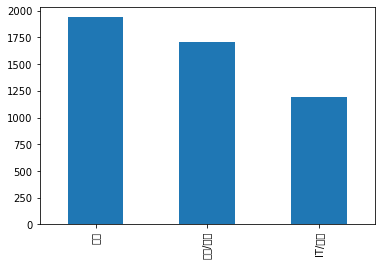

In [62]:
# 데이터 탐색하기
# 카테고리별로 데이터 분포 확인하기
df['code'].value_counts().plot(kind = 'bar')

In [63]:
print(df.groupby('code').size().reset_index(name = 'count'))

    code  count
0  IT/과학   1189
1     사회   1937
2  생활/문화   1702


In [64]:
# 토큰화
# 자연어 처리에서 문자열은 특정 단위로 나누어져야 하는데 이 단위를 토큰이라하며,
# 이 과정을 토큰화라고 한다.
# 한글은 교착어라서 형태소 분석기를 이용하여 토큰화한다.

from konlpy.tag import Mecab
tokenizer = Mecab()

kor_text = '밤에 귀가하던 여성에게 범죄를 시도한 대 남성이 구속됐다서울 제주경찰서는 \
            상해 혐의로 씨를 구속해 수사하고 있다고 일 밝혔다씨는 지난달 일 피해 여성을 \
            인근 지하철 역에서부터 따라가 폭행을 시도하려다가 도망간 혐의를 받는다피해 \
            여성이 저항하자 놀란 씨는 도망갔으며 신고를 받고 주변을 수색하던 경찰에 \
            체포됐다피해 여성은 이 과정에서 경미한 부상을 입은 것으로 전해졌다'

#- 형태소 분석, 즉 토큰화(tokenization)를 합니다.
print(tokenizer.morphs(kor_text))

['밤', '에', '귀가', '하', '던', '여성', '에게', '범죄', '를', '시도', '한', '대', '남성', '이', '구속', '됐', '다', '서울', '제주', '경찰서', '는', '상해', '혐의', '로', '씨', '를', '구속', '해', '수사', '하', '고', '있', '다고', '일', '밝혔', '다', '씨', '는', '지난달', '일', '피해', '여성', '을', '인근', '지하철', '역', '에서부터', '따라가', '폭행', '을', '시도', '하', '려다가', '도망간', '혐의', '를', '받', '는다', '피해', '여성', '이', '저항', '하', '자', '놀란', '씨', '는', '도망갔으며', '신고', '를', '받', '고', '주변', '을', '수색', '하', '던', '경찰', '에', '체포', '됐', '다', '피해', '여성', '은', '이', '과정', '에서', '경미', '한', '부상', '을', '입', '은', '것', '으로', '전해졌', '다']


In [66]:
# 불용어 제거하기
# 불용어: 데이터 전체에 많이 등장은 하지만 실제 자연어 처리에 큰 영향을 주지 않는,
# 중요하지 않은 단어들을 말한다. 예를 들면, ~가, ~은, ~는과 같은 조사나 접사 등
# 해당 데이터 특성으로 인해 자주 등장할 수 밖에 없는 단어들도 불용어

stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다',
             '과','때문','할','수','무단','따른','및','금지','전재','경향신문',
             '기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

# 결과 확인 후 지속적으로 추가해야 한다.

In [67]:
# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수입니다.
def preprocessing(data):
    text_data = []

    for sentence in data:
        temp_data = []
        #- 토큰화
        temp_data = tokenizer.morphs(sentence) 
        #- 불용어 제거
        temp_data = [word for word in temp_data if not word in stopwords] 
        text_data.append(temp_data)

        text_data = list(map(' '.join, text_data))

    return text_data

In [ ]:
text_data = preprocessing(df['news'])
print(text_data[0])